Checklist for ML projects:
    
1. Frame the problem

2. Gather the data

3. Explore the data to gain insights

4. Prepare the data to better expose the underlying data patterns to ML algos

5. Explore diff models and shortlist best ones

6. Finetune your models and combine them into a great solution

7. Present your solution

8. Lauch, monitor, & maintain your system

--> continuous data --> regression model

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\91999\Desktop\DATA SCIENCE\1. PROJECTS\Predictions\House Price Prediction\housing.csv")

In [3]:
data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.shape

(20640, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
data.columns.unique()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [8]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [10]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
import matplotlib.pyplot as plt

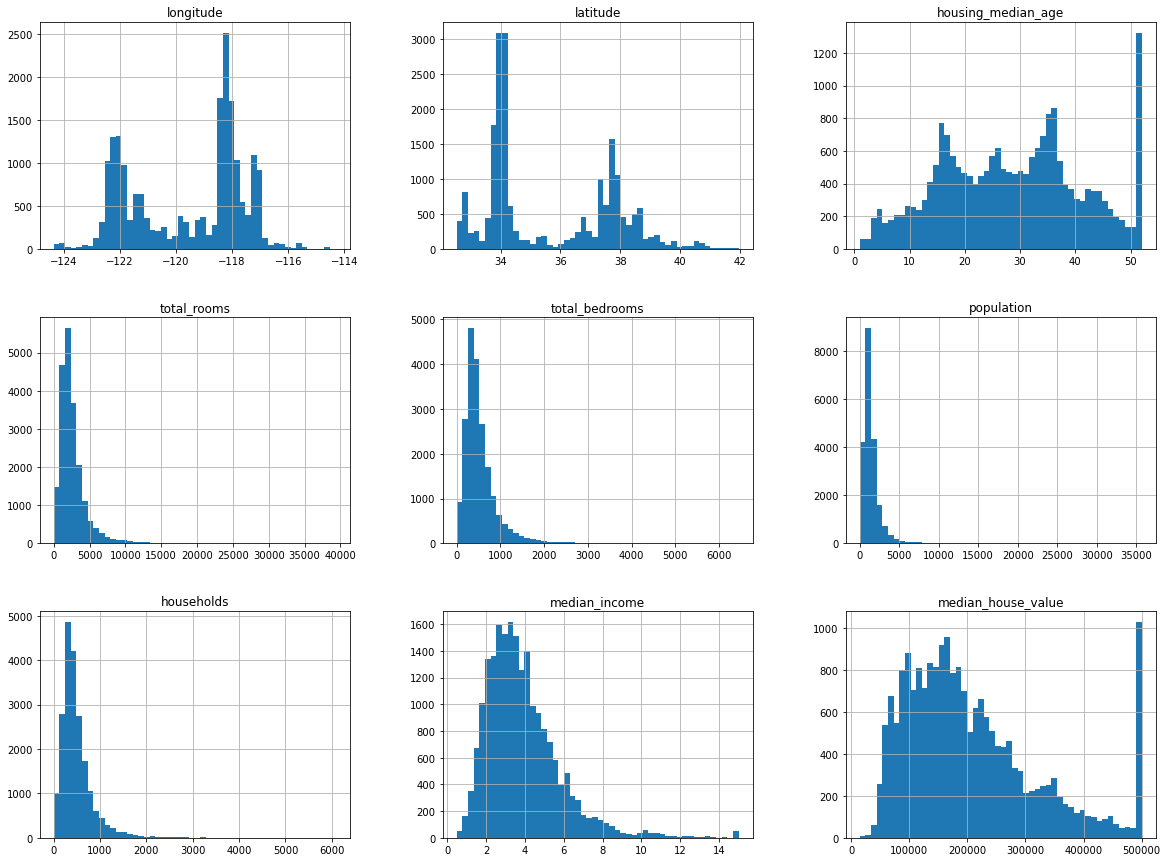

In [12]:
data.hist(bins=50, figsize=(20,15))
plt.show()

# Splitting Data

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_set, test_set =train_test_split(data, test_size=0.2, random_state=42)

In [15]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


In [16]:
print(train_set.shape)
print(test_set.shape)

(16512, 10)
(4128, 10)


# Creating income categories

In [17]:
house = data.copy()

In [18]:
import numpy as np

In [19]:
house['income_cat'] = np.ceil(house['median_income']/1.5)

In [20]:
house


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2.0


In [21]:
house['income_cat'].unique()

array([ 6.,  5.,  4.,  3.,  2.,  1.,  8.,  7.,  9., 11., 10.])

In [22]:
house['income_cat'].value_counts()

3.0     7236
2.0     6581
4.0     3639
5.0     1423
1.0      822
6.0      532
7.0      189
8.0      105
9.0       50
11.0      49
10.0      14
Name: income_cat, dtype: int64

**.where(condition, value)** is a pandas method that operates element-wise on a DataFrame or Series. 
It checks a specified condition and returns a modified copy of the original data where the condition is True and the data is replaced with the specified 'value' where the condition is False.

Here, the condition is house['income_cat'] < 5, which checks whether each value in the 'income_cat' column is less than 5.

The specified 'value' is 5.0.

In [23]:
house['income_cat'].where(house['income_cat']<5,5.0, inplace=True)

In [24]:
house['income_cat'].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

 now we have only 5 income categories

In [25]:
import seaborn as sns

In [26]:
sns.set_style('darkgrid')

<AxesSubplot:>

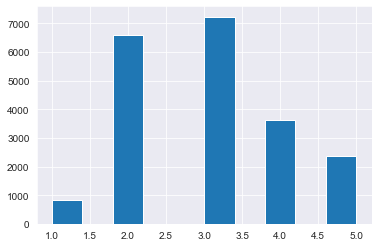

In [27]:
house['income_cat'].hist()

# house.income_cat.hist()

# Stratified sampling techniques

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit

In [29]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [30]:
print(split)

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)


**StratifiedShuffleSplit** object, which is often used in machine learning for creating stratified random splits of a dataset.

Stratified sampling is a method where the data is divided into subsets such that each subset has a similar proportion of different classes or categories as the whole dataset. 

It's commonly used in classification tasks to ensure that training and testing sets have similar class distributions.

After initializing the StratifiedShuffleSplit object, you can use it to split your data into training and testing sets. 

Typically, you would use it like this:
    
    for train_index, test_index in split.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]


Where X is your feature matrix, and y is your target variable. 

The train_index and test_index are arrays that contain the indices of the samples in the training and testing sets, respectively.



for train_index, test_index in split.split(X, y):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


The train_index and test_index arrays are used to extract the corresponding rows from both X and y, resulting in X_train, X_test, y_train, and y_test representing the training and testing data splits.

In [31]:
for train_index, test_index in split.split(house,house['income_cat']):
    strat_train_set = house.iloc[train_index]
    strat_test_set = house.iloc[test_index]

In [32]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [33]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2.0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5.0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2.0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2.0
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3.0


In [34]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5.0
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN,4.0
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN,3.0
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN,3.0
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN,3.0


## removing income category

In [35]:
for set_ in (strat_test_set, strat_train_set):
    set_.drop('income_cat', axis=1, inplace=True)

C:\Users\91999\AppData\Local\Temp\ipykernel_8792\1653669251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop('income_cat', axis=1, inplace=True)
C:\Users\91999\AppData\Local\Temp\ipykernel_8792\1653669251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop('income_cat', axis=1, inplace=True)


In [36]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN


# Data Exploration

In [37]:
housing = strat_train_set.copy()

In [38]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [39]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [40]:
housing.shape

(16512, 10)

# Visualization

In [41]:
plt.rcParams['figure.figsize']=(12,10)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

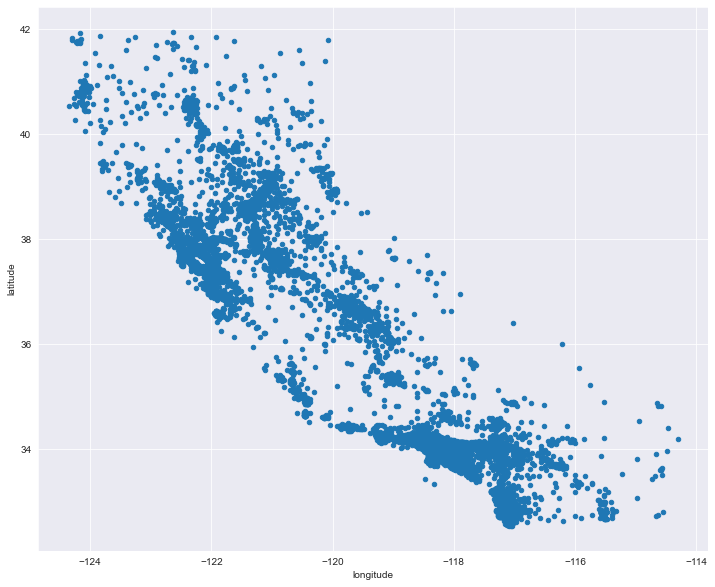

In [42]:
housing.plot(kind='scatter', x='longitude', y='latitude')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

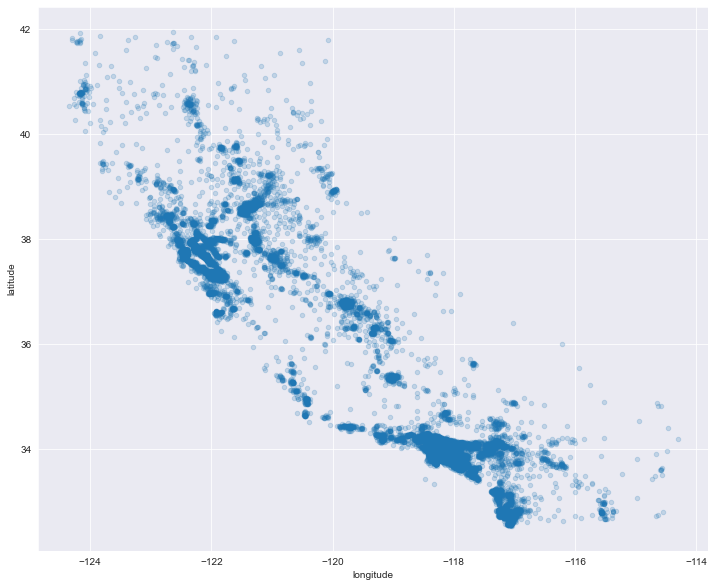

In [43]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.2)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

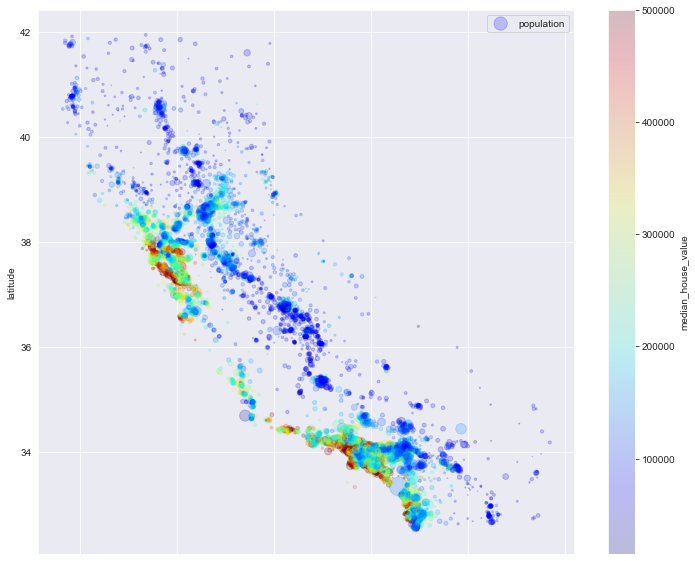

In [44]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.2, s=housing['population']/100, label='population', c='median_house_value', cmap =plt.get_cmap('jet'),colorbar=True) 

**kind='scatter'**: Specifies that you want to create a scatter plot.

**x='longitude'**: The 'longitude' column of the DataFrame will be used for the x-axis.

**y='latitude'**: The 'latitude' column of the DataFrame will be used for the y-axis.

**alpha=0.2**: This sets the transparency (alpha) of the points to 0.2, making them somewhat transparent.

**s=housing['population']/100**: The size of the points is determined by the 'population' column divided by 100.

**label='population'**: This label will be used for the legend.

**c='median_house_value'**: The color of the points is determined by the 'median_house_value' column.

**cmap=plt.get_cmap('jet')**: Specifies the colormap to use for coloring the points. 'jet' is a popular colormap in matplotlib.

**colorbar=True**: This adds a colorbar to the plot to indicate the color scale.

# Correlation

In [45]:
corr_matrix = housing.corr()

In [46]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


In [47]:
corr_matrix['median_house_value'].sort_values(ascending=True)

latitude             -0.142673
longitude            -0.047466
population           -0.026882
total_bedrooms        0.047781
households            0.064590
housing_median_age    0.114146
total_rooms           0.135140
median_income         0.687151
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [48]:
from pandas.plotting import scatter_matrix

In [49]:
attributes = ['median_house_value',
             'median_income',
             'total_rooms',
             'housing_median_age']

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

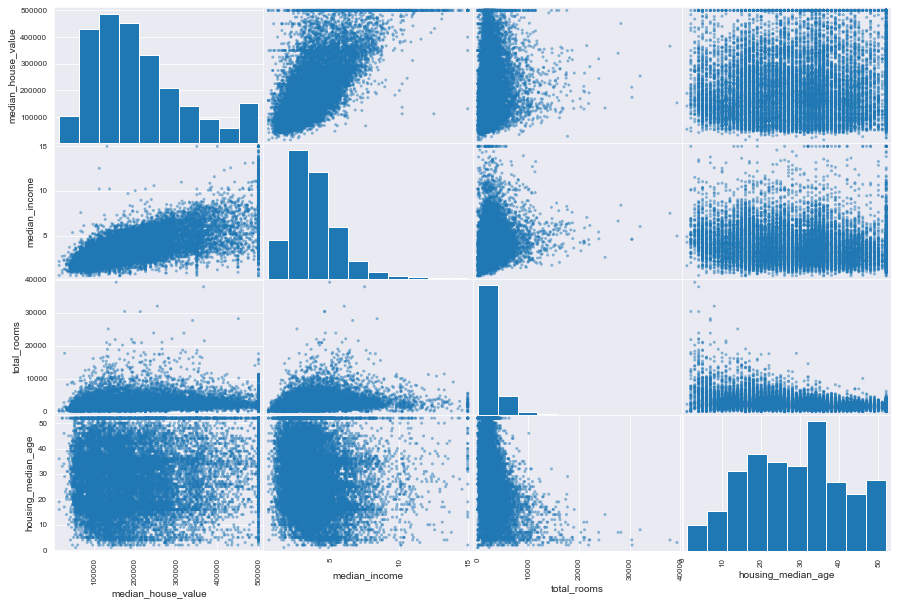

In [50]:
scatter_matrix(housing[attributes], figsize=(15,10))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

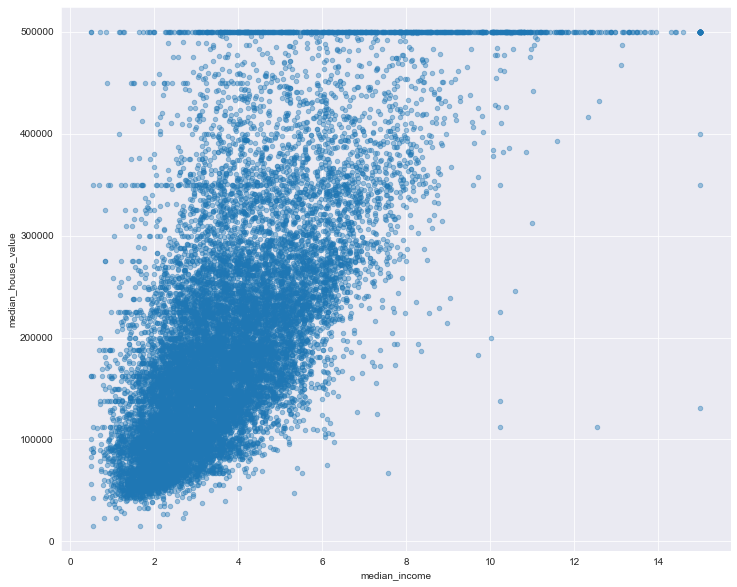

In [51]:
housing.plot(kind='scatter', x= 'median_income', y='median_house_value', alpha=0.4)

In [52]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [53]:
# housing.drop(columns = ['total_rooms','total_bedrooms'])
# here total rooms is the tptal no of rooms in a district. But wee need rooms per house,
# otherwise it's barely useful

housing['rooms_per_h'] = housing['total_rooms']/housing['households']



In [54]:
housing['bderooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_h'] = housing['population']/housing['households']

In [55]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_h,bderooms_per_room,population_per_h
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241


In [56]:
corr_matrix = housing.corr()

In [57]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_h,bderooms_per_room,population_per_h
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466,-0.028374,0.095645,-0.000415
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673,0.107665,-0.116955,0.005426
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146,-0.147184,0.136768,0.015031
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140,0.127549,-0.192655,-0.024806
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781,0.000426,0.086883,-0.028364
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882,-0.074665,0.037736,0.076232
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590,-0.082971,0.067090,-0.027411
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151,0.311528,-0.624650,0.021815
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000,0.146255,-0.259952,-0.021991
rooms_per_h,-0.028374,0.107665,-0.147184,0.127549,0.000426,-0.074665,-0.082971,0.311528,0.146255,1.000000,-0.398529,-0.005316


In [58]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
rooms_per_h           0.146255
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population_per_h     -0.021991
population           -0.026882
longitude            -0.047466
latitude             -0.142673
bderooms_per_room    -0.259952
Name: median_house_value, dtype: float64

In [59]:
housing.to_csv('housing')

# Data Preparation & Pipeline Setting

In [60]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [61]:
housing2 = strat_train_set.drop('median_house_value', axis=1)

# now housing2 only has predictors

In [62]:
housing2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [63]:
housing_labels = strat_train_set['median_house_value'].copy()

In [64]:
print(housing_labels)

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64


## Data Cleaning

**Removing missing values**

In [65]:
housing2['total_bedrooms'].isnull().sum()

158

- get rid of corresponding districts
- get rid of the whole attribute (tot bedroom)
- replace with 0/median/mean/mode...

But sklearn has a special class for imputation

## Imputer

In [66]:
from sklearn.impute import SimpleImputer

In [67]:
imputer = SimpleImputer(strategy='median')

In [68]:
imputer

SimpleImputer(strategy='median')

In [69]:
housing2['ocean_proximity'].dtype # we can't apply median to it

dtype('O')

In [70]:
housing_num = housing2.drop('ocean_proximity', axis=1)

In [71]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [72]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [73]:
imputer.statistics_

# median values of all attributes in housing_num

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [74]:
x = imputer.transform(housing_num)

In [75]:
x

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [76]:
housing_tr = pd.DataFrame(x, columns=housing_num.columns)

In [77]:
# training data

housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [78]:
housing_tr.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

**sklearn**
- Estimators
- Trsansformers
- Predictor

## Handling Text & Categorical Attributes

In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
housing2.ocean_proximity.unique()

array(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'],
      dtype=object)

In [81]:
encoder = LabelEncoder()

In [82]:
housing_cat = housing2['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)

In [83]:
housing_cat.ndim

1

In [84]:
housing_cat_encoded

array([1, 4, 1, ..., 0, 0, 1])

In [85]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [86]:
housing2.ocean_proximity

12655        INLAND
15502    NEAR OCEAN
2908         INLAND
14053    NEAR OCEAN
20496     <1H OCEAN
            ...    
15174     <1H OCEAN
12661        INLAND
19263     <1H OCEAN
19140     <1H OCEAN
19773        INLAND
Name: ocean_proximity, Length: 16512, dtype: object

here, INLAND=1, <1H OCEAN=0, 0 & 1 are nearby values so algo considers
INLAND and <1H OCEAN are related, but in reality <1H OCEAN and NEAR OCEAN
are more related.

So, this encoding could be misleading,

Therefore, we've to use a diff method i.e., to assign a binary value to each category.

**One hot encoding**


**'<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN'**

       1          0        0          0         0
       
       0          1        0          0         0
       
       0          0        1          0         0
       
       0          0        0          1         0
       
       0          0        0          0         1

In [87]:
from sklearn.preprocessing import OneHotEncoder

In [88]:
housing_cat_encoded

array([1, 4, 1, ..., 0, 0, 1])

In [89]:
housing_cat_encoded.ndim  # this is 1D, but 2D is needed

1

In [90]:
encoder = OneHotEncoder()

In [91]:
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))

In [92]:
housing_cat_1hot.ndim

2

In [93]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

sparse matrix only stores non-zero values, hence saves a lot of mem space

In [94]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

# Feature Scaling

## Normalization & Standardization

In [95]:
housing2.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [96]:
strat_housing = strat_train_set.copy()

In [97]:
rooms_index, bedroom_ix, population_ix, household_ix =[
    list(strat_housing.columns).index(col)
    for col in ('total_rooms',
       'total_bedrooms', 'population', 'households')
]

from sklearn.preprocessing import FunctionTransformer



def add_extra_features(x, add_bedrooms_per_room=True):
    rooms_per_household = x[:, rooms_index] / x[:, household_ix]
    population_per_household = x[:, population_ix] / x[:, household_ix]
    
    if add_bedrooms_per_room:
        bedrooms_per_room = x[:, bedroom_ix] / x[:, rooms_index]  # Correct the variable name here
        return np.c_[x, rooms_per_household, population_per_household, bedrooms_per_room]  # Correct the variable name here
    
    else:
        return np.c_[x, rooms_per_household, population_per_household]

attr_adder = FunctionTransformer(add_extra_features, validate=False, kw_args={'add_bedrooms_per_room': False})
housing_extra_attr = attr_adder.fit_transform(strat_housing.values)




# def add_extra_features(x, add_bedrooms_per_room=True):
#     rooms_per_household = x[:,rooms_index]/x[ household_ix]
#     population_per_household = x[:,population_ix]/x[:,household_ix]
    
#     if add_bedrooms_per_room:
#         bedrooms_per_room = x[:,bedrooms_ix]/x[:,rooms_index]
#         return np.c_[x, rooms_per_household, population_per_household, bedrooms_per_household]
    
#     else:
#         return np.c_[x, rooms_per_household,population_per_household]
    
# attr_adder = FunctionTransformer(add_extra_features, validate=False, kw_args= {'add_bedrooms_per_room':False})
# housing_extra_attr =  attr_adder.fit_transform(strat_housing.values)

In [98]:
housing_extra_attr = pd.DataFrame(housing_extra_attr, columns=list(strat_housing.columns)+ ['rooms_per_household','population_per_household'], index= strat_housing.index )

In [99]:
housing_extra_attr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,82700.0,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,3.167241


In [100]:
# 12655	-121.46	38.52	29.0	3873.0	797.0	2237.0	706.0	2.1736	72100.0	INLAND	5.485836	0.205784	3.168555

In [101]:
housing_extra_attr.loc[12655]

longitude                    -121.46
latitude                       38.52
housing_median_age              29.0
total_rooms                   3873.0
total_bedrooms                 797.0
population                    2237.0
households                     706.0
median_income                 2.1736
median_house_value           72100.0
ocean_proximity               INLAND
rooms_per_household         5.485836
population_per_household    3.168555
Name: 12655, dtype: object

# Building a Pipeline

### 1. For processing numerical attributes

In [102]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [106]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attr_adder', FunctionTransformer(add_extra_features, validate=False)),
    ('std_scaler', StandardScaler())
])

In [107]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [108]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [109]:
strat_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [110]:
from sklearn.compose import ColumnTransformer

In [111]:
num_attr = list(housing_num)
cat_attr = ['ocean_proximity']

## full pipeline

In [112]:
full_pipeline = ColumnTransformer([
    ('num',num_pipeline, num_attr),
    ('cat',OneHotEncoder(),cat_attr)
])

In [113]:
housing_prepared = full_pipeline.fit_transform(strat_housing)

In [114]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [115]:
housing_prepared.shape

(16512, 16)

In [116]:
housing_prepared.tolist()

[[-0.9413504586000941,
  1.347438216815126,
  0.02756357138483158,
  0.5847774454783182,
  0.6403712747566713,
  0.7326023581928217,
  0.556286018753369,
  -0.8936472017581817,
  0.017395255354801475,
  0.006222642111402968,
  -0.12112176143791016,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0],
 [1.1717821162456232,
  -1.1924396559322872,
  -1.7220176265077816,
  1.2614666806325303,
  0.7815613248778976,
  0.5336115200296541,
  0.7213179906343863,
  1.2921680006896117,
  0.5692555390956567,
  -0.04081076979240782,
  -0.8108669566037208,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0],
 [0.2675811799641191,
  -0.12597159886707773,
  1.2204598426752498,
  -0.46977281386705017,
  -0.5451382840198321,
  -0.6746751909791298,
  -0.5244072164674863,
  -0.5254336457870785,
  -0.018024319769543485,
  -0.07537121621716976,
  -0.3382725169289391,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0],
 [1.2217379690788597,
  -1.3514743661963993,
  -0.3700685190453078,
  -0.3486515202216176,
  -0.03636724134162013,
  -0.4676171566742121,
  

In [117]:
list(housing_prepared)

[array([-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ]),
 array([ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ]),
 array([ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ]),
 array([ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.59513997, -0.10680295,
         0.96120521,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ]),
 array([ 0.43743108, -0.63581817

# Select & Train Model

In [118]:

from sklearn.linear_model import LinearRegression

In [159]:
lr_model = LinearRegression()

In [160]:
lr_model

LinearRegression()

In [161]:
lr_model.fit(housing_prepared,housing_labels)

LinearRegression()

## using pipeline

In [162]:
some_data = strat_housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [163]:
some_data_prepared = full_pipeline.transform(some_data)

## predictions

In [164]:
pred = lr_model.predict(some_data_prepared)

In [165]:
print(pred)

[ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [166]:
some_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [167]:
some_data_prepared


array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.59513997, -0.10680295,
         0.96120521,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.43743108, -0.63581817, -0

In [168]:
some_labels

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64

In [169]:
dff = [[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ]]

In [170]:
lr_model.predict(dff)

array([85657.90190189])

In [171]:
lr_model.score(some_data_prepared, some_labels)

0.6940795277644147




























## RMSE

In [172]:
from sklearn.metrics import mean_squared_error

In [173]:
housing_pred = lr_model.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_pred)

In [174]:
lin_mse

4709785076.060029

In [175]:
print(np.sqrt(lin_mse))

68627.87390018745


## Mean Absolute Error

In [176]:
from sklearn.metrics import mean_absolute_error

In [177]:
lin_mae =  mean_absolute_error(housing_labels, housing_pred)
lin_mae

49438.66860915801

###  Different Models

## Decision Tree

In [178]:
from sklearn.tree import DecisionTreeRegressor

In [179]:
dec_reg = DecisionTreeRegressor(random_state=42)

In [180]:
dec_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(random_state=42)

In [181]:
dec_pred = dec_reg.predict(housing_prepared)

In [182]:
dec_mse = mean_squared_error(housing_labels, dec_pred)
dec_mse

0.0

0.0 --> overfitting

In [183]:
dec_pred2 = dec_reg.predict(some_data_prepared)
dec_pred2

array([ 72100., 279600.,  82700., 112500., 238300.])

In [184]:
some_labels

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64

## Cross Validation for better evaluation

In [185]:
from sklearn.model_selection import cross_val_score

In [186]:
scores = cross_val_score(dec_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=5)

scores

array([-4.83785122e+09, -5.02041171e+09, -4.83084745e+09, -5.36800654e+09,
       -5.08511499e+09])

In [187]:
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([69554.66351285, 70854.86367859, 69504.29805424, 73266.68096272,
       71309.99221061])

In [188]:
def display_scores(scores):
    print("Scores: ", scores)
    print('scores_mean: ', scores.mean())
    # std deviation

In [189]:
display_scores(tree_rmse_scores)

Scores:  [69554.66351285 70854.86367859 69504.29805424 73266.68096272
 71309.99221061]
scores_mean:  70898.09968380092


In [192]:

lr_scores = cross_val_score(lr_model, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=5)

In [193]:
lr_rmse = np.sqrt(-lr_scores)

In [194]:
 display_scores(lr_rmse)

Scores:  [68076.63768302 67881.16711321 69712.97514343 71266.9225777
 68390.25096271]
scores_mean:  69065.59069601326


In [207]:
pd.Series(np.sqrt(-lr_scores)).describe()

count        5.000000
mean     69065.590696
std       1423.195324
min      67881.167113
25%      68076.637683
50%      68390.250963
75%      69712.975143
max      71266.922578
dtype: float64

## Random Forest Regressor

In [195]:
from sklearn.ensemble import RandomForestRegressor

In [196]:
rfr = RandomForestRegressor(n_estimators=10, random_state=42)

In [197]:
rfr.fit(housing_prepared, housing_labels)

RandomForestRegressor(n_estimators=10, random_state=42)

In [198]:
rfr_pred = rfr.predict(housing_prepared)

In [199]:
rfr_pred

array([ 74290., 310200.,  80170., ..., 161090., 202840.,  69320.])

In [200]:
rfr_mse  = mean_squared_error(housing_labels, rfr_pred)


#rmse

print(np.sqrt(rfr_mse))

22413.454658589766


In [201]:
rfr_mse

502362949.7326593

In [202]:
rfr_scores =cross_val_score(rfr, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=5)

In [203]:
rfr_scores

array([-2.70911941e+09, -2.76530344e+09, -2.76661486e+09, -2.95014109e+09,
       -2.82505717e+09])

In [204]:
rfr_rmse_scores = np.sqrt(-rfr_scores)
rfr_rmse_scores

array([52049.20186429, 52586.15254663, 52598.62030193, 54315.20123756,
       53151.26685099])

In [205]:
display_scores(rfr_rmse_scores)

Scores:  [52049.20186429 52586.15254663 52598.62030193 54315.20123756
 53151.26685099]
scores_mean:  52940.08856028017


# Saving the model

In [208]:
import joblib

In [210]:
joblib.dump(lr_model, 'lin_reg.pkl')   # saving as pickle file

['lin_reg.pkl']

In [211]:
my_model_load = joblib.load('lin_reg.pkl')

In [212]:
my_model_load

LinearRegression()

## Finetune models

In [214]:
from sklearn.model_selection import GridSearchCV

In [215]:
param_grid = [{'n_estimators':[3,10,10],'max_features':[2,4,6,8]},
             {'bootstrap': [False],'n_estimators':[3,10],'max_features':[2,3,4] }]
        

In [216]:
forest_reg = RandomForestRegressor(random_state=42)

In [218]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 10]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [219]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}

In [220]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=10,
                      random_state=42)

In [221]:
cvres =  grid_search.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

63895.161577951665 {'max_features': 2, 'n_estimators': 3}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52754.5632813202 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

# Feature Importance

In [223]:
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

array([8.88082990e-02, 7.05668486e-02, 3.86113255e-02, 2.15603838e-02,
       1.97051422e-02, 2.23105074e-02, 1.83233808e-02, 2.43140020e-01,
       6.40965222e-02, 9.89116739e-02, 1.07787130e-01, 8.95692438e-03,
       1.87146885e-01, 6.87493232e-05, 5.61663924e-03, 4.38956900e-03])

In [224]:
extra_attribs = ['rooms_per_hhold','pop_per_hh', 'bedrooms_per_room']

In [227]:
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attrib = list(cat_encoder.categories_[0])
attributes = num_attr + extra_attribs + cat_attr + cat_one_hot_attrib

sorted(zip(feature_importance, attributes), reverse=True)

[(0.24314001957699577, 'median_income'),
 (0.187146885439308, '<1H OCEAN'),
 (0.10778712955895622, 'bedrooms_per_room'),
 (0.09891167393285183, 'pop_per_hh'),
 (0.08880829897051053, 'longitude'),
 (0.07056684863704442, 'latitude'),
 (0.06409652224775206, 'rooms_per_hhold'),
 (0.03861132547995763, 'housing_median_age'),
 (0.02231050738793368, 'population'),
 (0.0215603838428609, 'total_rooms'),
 (0.019705142166241644, 'total_bedrooms'),
 (0.01832338081792807, 'households'),
 (0.00895692438036383, 'ocean_proximity'),
 (0.00561663924013068, 'ISLAND'),
 (0.004389568997971811, 'NEAR BAY'),
 (6.874932319290487e-05, 'INLAND')]

# Final Model 

In [228]:
final_model = grid_search.best_estimator_

test_label =  strat_test_set['median_house_value'].copy()

In [229]:
test_prep = full_pipeline.transform(strat_test_set)

In [231]:
final_prediction =  final_model.predict(test_prep)

In [232]:
final_mse = mean_squared_error(test_label, final_prediction)

final_rmse = np.sqrt(final_mse)

In [233]:
final_rmse

49207.07975228001

## Z score

In [234]:
from scipy import stats

In [236]:
confidence = 0.95
squared_errors = (final_prediction - test_label)**2

In [237]:
squared_errors

5241     2.274124e+08
17352    1.976836e+08
3505     1.449616e+08
7777     4.356000e+05
14155    8.888718e+09
             ...     
12182    4.325693e+09
7275     2.450250e+07
17223    1.552360e+09
10786    4.406304e+09
3965     1.260250e+07
Name: median_house_value, Length: 4128, dtype: float64

In [238]:
mean = squared_errors.mean()

In [239]:
m = len(squared_errors)

In [240]:
zscore = stats.norm.ppf((1 + confidence)/2)

zmargin = zscore + squared_errors.std(ddof=1)/np.sqrt(m)

np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(48215.063188823246, 50179.48861031014)